## Gráfico de evolución 1
Partiendo de un conjunto de datos temporales, vamos a aprovechar para elaborar un gráfico de evolución del precio de criptomonedas. En esta ocasión hemos utilizado el «dataset» eth-usd.csv descargado desde esta página de Kaggle. Contiene la valoración de la criptomoneda Ethereum en función de una marca temporal, así como el volumen de «moneda» existente en cada momento.

El objetivo será crear un gráfico que represente el valor de la criptomoneda (a lo largo del tiempo) en contraposición al volumen de unidades.

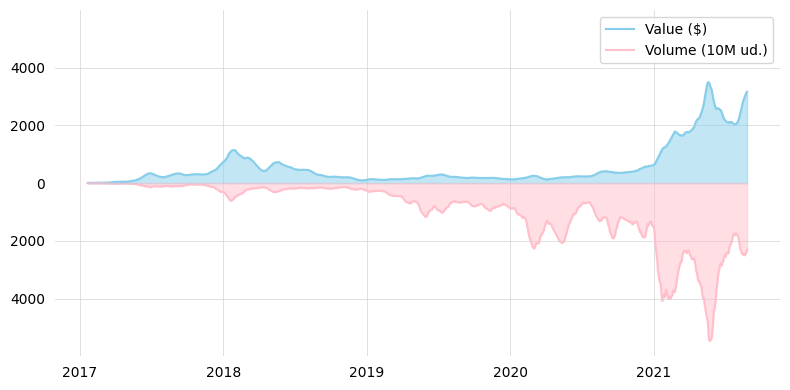

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Seleccionar las columnas Date (fecha de referencia), Open (precio de la moneda a la apertura) y Volume (volumen de moneda).
# Parsear el campo fecha
df = pd.read_csv(
    "./datos/eth-usd.csv",
    parse_dates=["Date"],
    useecols=["Date", "Open", "Volume"],
    index_col="Date",
)
# Filtrar sólo aquellos registros a partir del 1 de enero de 2017
min_date = datetime.datetime(year=2017, month=1, day=1)
df = df.loc[df.index > min_date]
# Dividir la columna de volumen por 10M de cara a equiparar cantidades con la valoración (ajuste de gráfico)
df["Volume"] /= 1e7
# Aplicar una media móvil para suavizar las curvas a representar.
df_smooth = df.rolling(20).mean().dropna()

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)  # 800x400px

# Alias para facilitar el acceso
x = df_smooth.index
y_open = df_smooth["Open"]
y_vol = df_smooth["Volume"]

# Líneas de evolución
ax.plot(x, y_open, label="Value ($)", color="skyblue", linewidth=1.5)
ax.plot(x, -y_vol, label="Volume (10M ud.)", color="pink", linewidth=1.5)
# Relleno del área
plt.fill_between(x, y_open, alpha=0.5, color="skyblue", zorder=3)
plt.fill_between(x, -y_vol, alpha=0.5, color="pink", zorder=3)

# Formateo de los ejes
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
y_ticks = [-4000, -2000, 0, 2000, 4000]
y_tick_labels = ["4000", "2000", "0", "2000", "4000"]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)
ax.set_ylim(-6000, 6000)

# Rejilla
ax.xaxis.grid(color="lightgray", linewidth=0.5)
for y_tick in y_ticks:
    if y_tick != 0:
        ax.axhline(y_tick, color="lightgray", linewidth=0.5)

ax.legend()
ax.spines[:].set_visible(False)

fig.tight_layout()

## Gráfico de evolución 2
Partiendo del fichero mwh-spain-2021-clean.csv que contiene información sobre el precio de la energía en España durante el año 2021 12, cree el siguiente diagrama de evolución que representa la variación del precio del MWh 13 en función del tiempo:

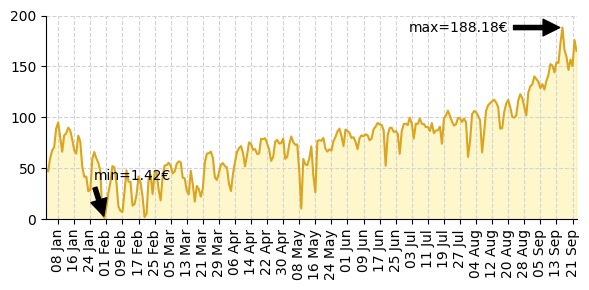

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter, DayLocator

df = pd.read_csv(
    "./datos/mwh-spain-2021-clean.csv",
    parse_dates=["Fecha"],
    index_col="Fecha",
)

fig, ax = plt.subplots(figsize=(6, 3), dpi=100)

x = df.index
y = df.iloc[:, 0]

ax.plot(x, y, color="goldenrod")
plt.fill_between(x, y, alpha=0.2, color="gold")  # área

# Anotación del valor máximo
xmax, ymax = y.idxmax(), y.max()
ax.annotate(
    f"max={ymax}€",
    xy=(xmax, ymax),
    xytext=(-75, 0),
    textcoords="offset points",
    ha="center",
    va="center",
    arrowprops=dict(facecolor="black", shrink=0.05, width=3),
)

# Anotación del valor mínimo
xmin, ymin = y.idxmin(), y.min()
ax.annotate(
    f"min={ymin}€",
    xy=(xmin, ymin),
    xytext=(20, 30),
    textcoords="offset points",
    ha="center",
    va="center",
    arrowprops=dict(facecolor="black", shrink=0.05, width=3),
)

# Estilos para el eje x
ax.set_xlim(x.min(), x.max())
ax.xaxis.set_major_locator(DayLocator(interval=8))
ax.xaxis.set_major_formatter(DateFormatter("%d %b"))
ax.tick_params(axis="x", which="major", rotation=90)

# Estilos para el eje y
ax.set_ylim(0, 200)

# Rejilla
ax.grid(color="lightgray", linestyle="dashed")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.tight_layout()